# Camera Calibration, undistortion and perspective transform

Testing the camera calibration and un-distoring the images of chessboards.


In [1]:
# importing all the libraries required in this file
import cv2
import numpy as np
import matplotlib as mp
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob

from random import randint

index : 14


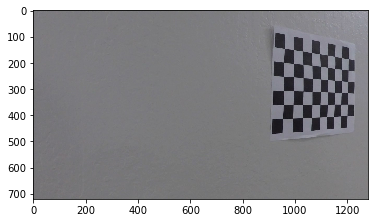

In [2]:
# read the one of images and display
index = randint(1,15)
sample_img_1 = mpimg.imread('camera_cal/calibration{}.jpg'.format(index))
imgplot = plt.imshow(sample_img_1)

# display the counter and image
print('index : {0}'.format(index))
plt.show()

no corner found


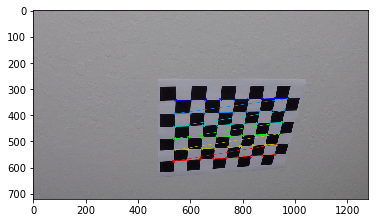

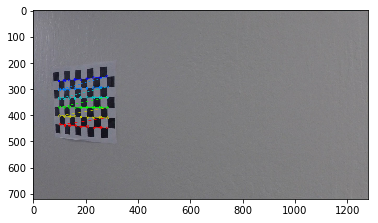

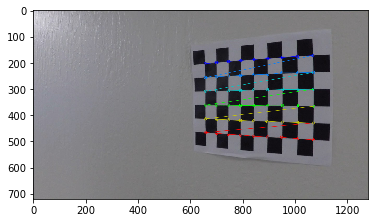

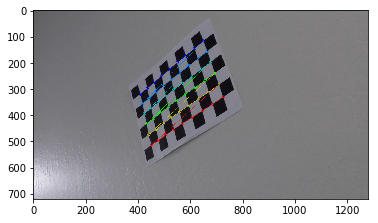

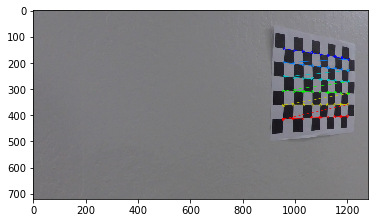

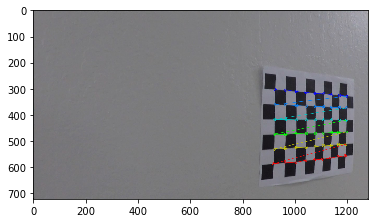

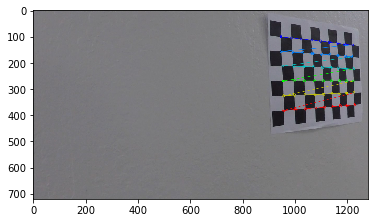

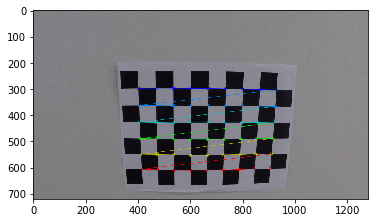

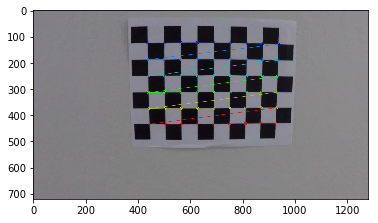

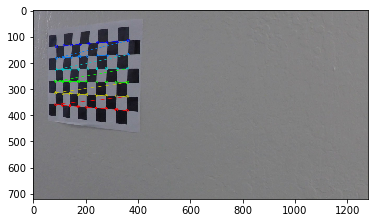

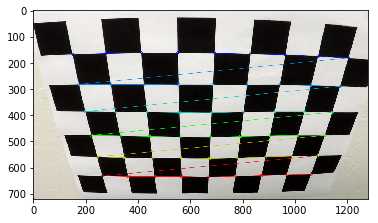

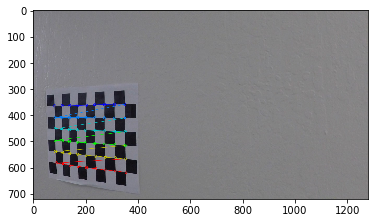

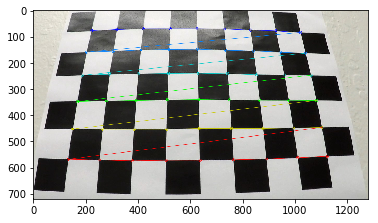

no corner found
no corner found


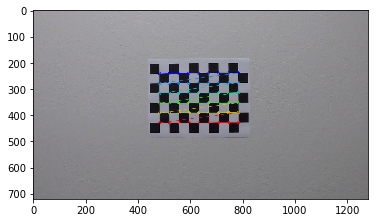

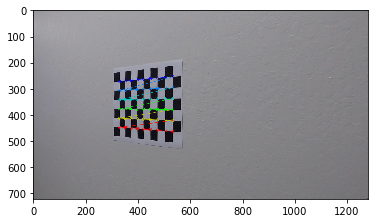

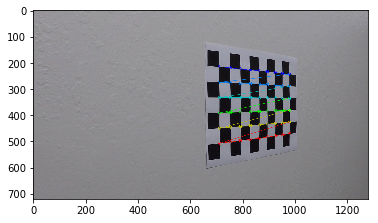

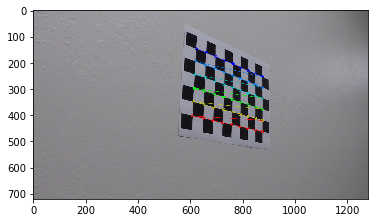

In [3]:
imageset = glob.glob('camera_cal/calibration*.jpg')

## Finding corner in the image
nx = 9
ny = 6
obj_points = []
img_points = []

# Prepare the object points
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

for fname in imageset:
    img = mpimg.imread(fname)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # If found, draw corners
    if ret == True:
        img_points.append(corners)
        obj_points.append(objp)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)
        plt.show()
    else:
        print('no corner found')

In [4]:
def cal_undistort(orig_img, objpoints, imgpoints):
    gray_img = cv2.cvtColor(orig_img, cv2.COLOR_RGB2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray_img.shape[::-1], None, None)
    undist = cv2.undistort(orig_img, mtx, dist, None, mtx)
    return undist
    

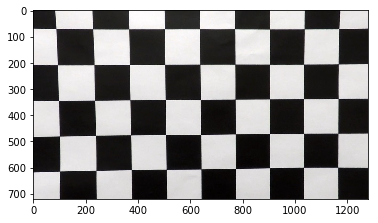

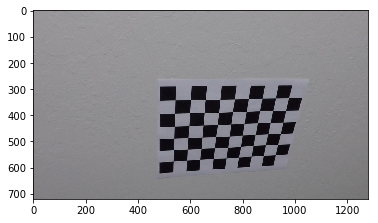

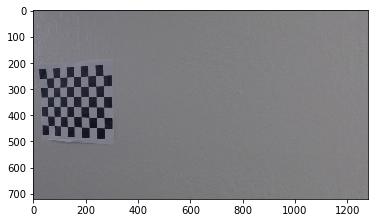

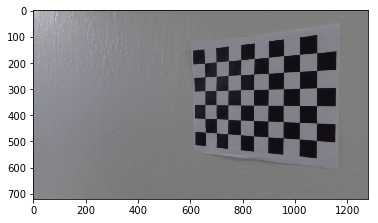

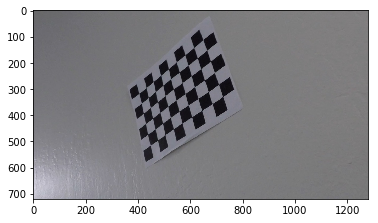

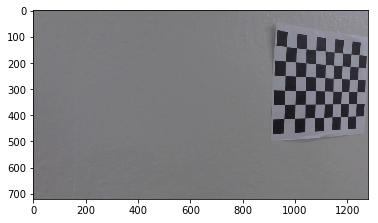

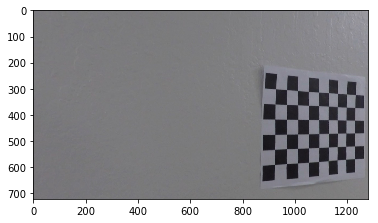

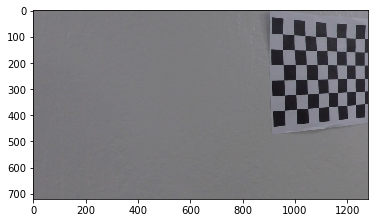

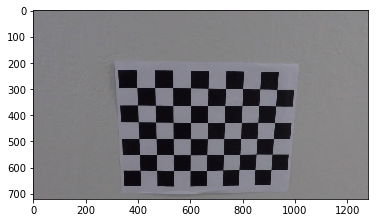

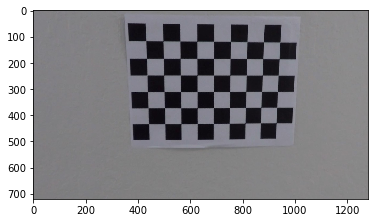

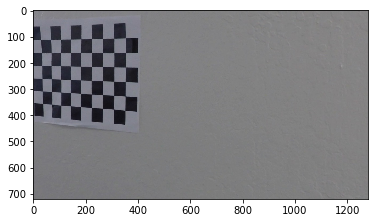

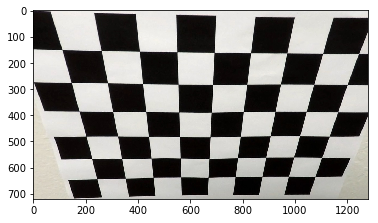

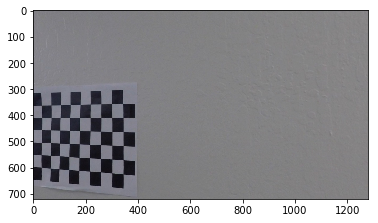

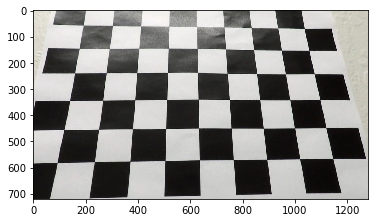

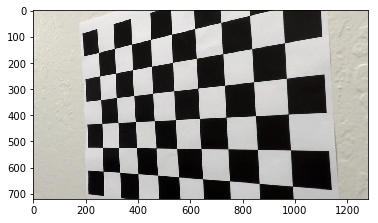

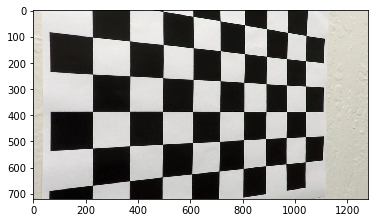

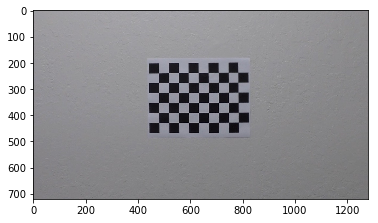

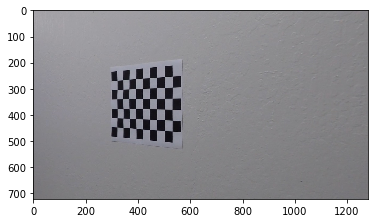

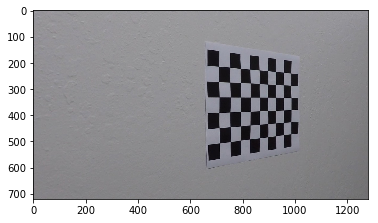

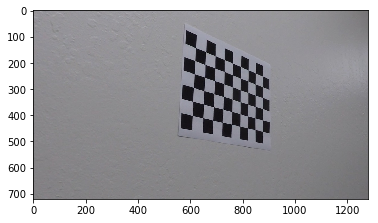

In [5]:
#undistoring all the chessboard images
for fname in imageset:
    img = mpimg.imread(fname)
    undistorted_img = cal_undistort(img, obj_points, img_points)
    plt.imshow(undistorted_img)
    plt.show()
    

In [32]:
# doing perspective transform on the undistored image
def performPerspectiveTransform(fname):
    img = mpimg.imread(fname)
    undistored = cal_undistort(sample_img_1, obj_points, img_points)
    gray = cv2.cvtColor(undistored, cv2.COLOR_RGB2GRAY)
    # finding corner and displaying them on the image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    cv2.drawChessboardCorners(undistored, (nx,ny), corners, ret)
    plt.imshow(undistored)
    plt.show()

    offset = 100
    img_size = (gray.shape[1], gray.shape[0])
    # taking 4 outer corners as source points
    src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
    # creating the destination points. taken from the example shown in the course module
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                         [img_size[0]-offset, img_size[1]-offset], 
                                         [offset, img_size[1]-offset]])
    # getting the perpective transform
    M = cv2.getPerspectiveTransform(src, dst)
    # using perspective transform on the undistorted image
    warped = cv2.warpPerspective(undistored, M, img_size)
    plt.imshow(warped)
    plt.show()

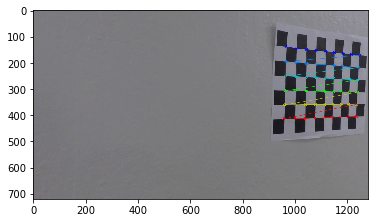

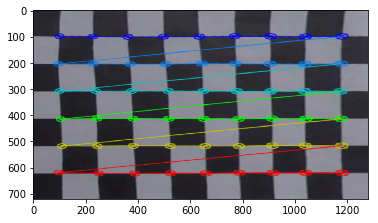

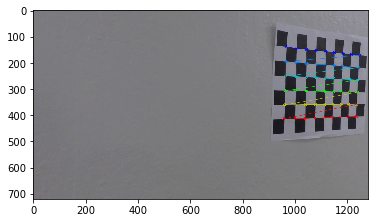

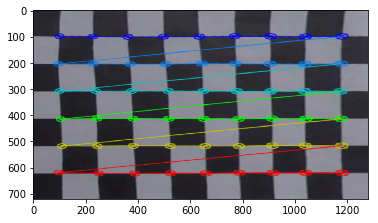

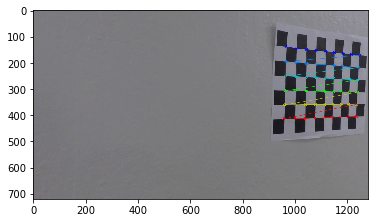

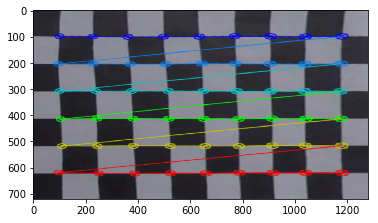

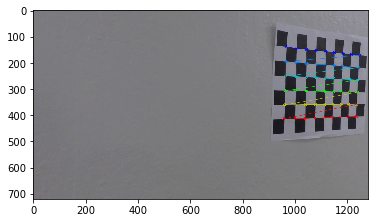

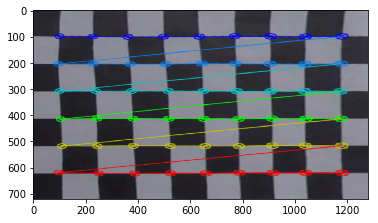

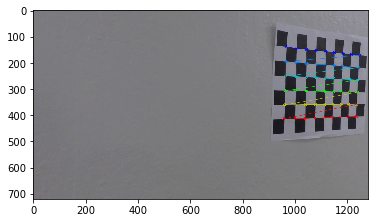

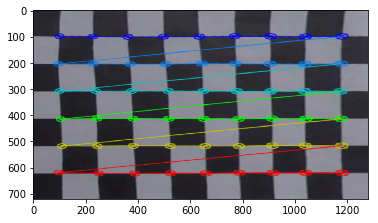

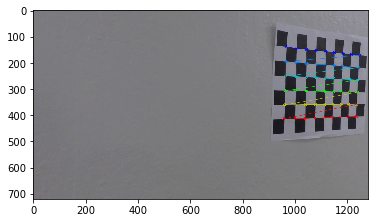

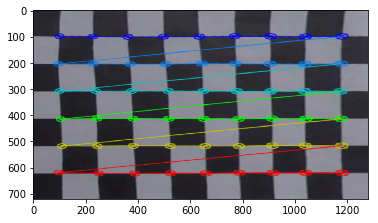

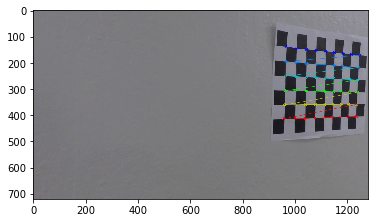

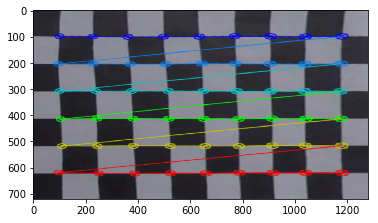

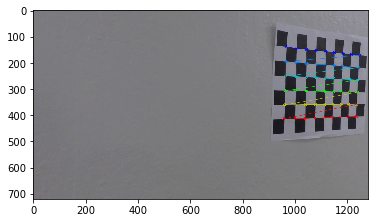

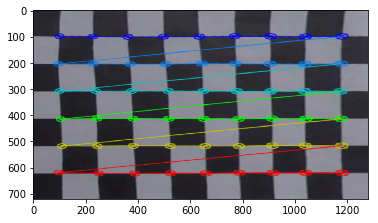

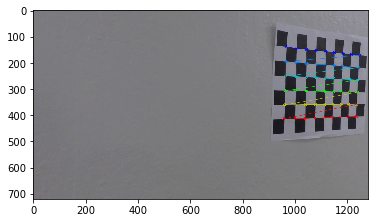

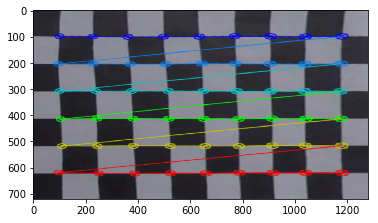

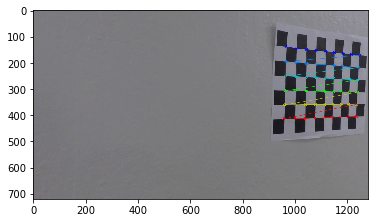

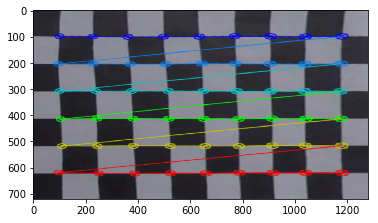

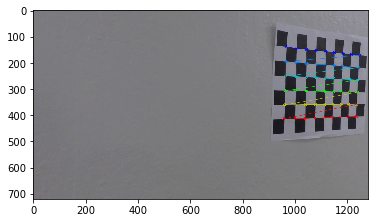

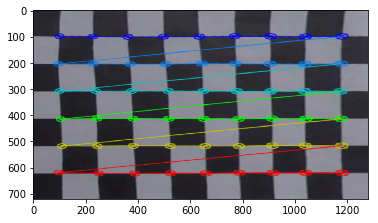

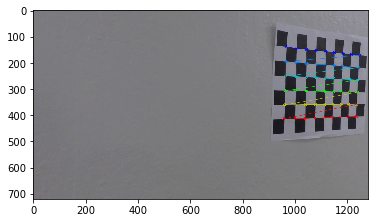

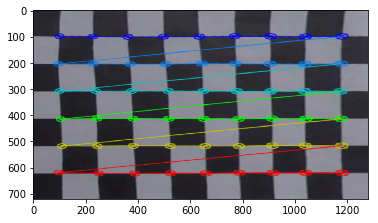

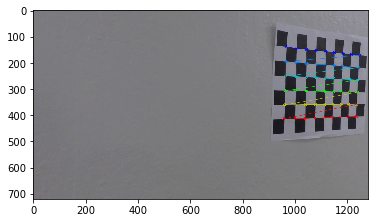

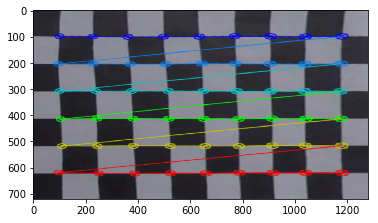

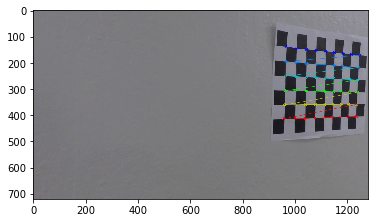

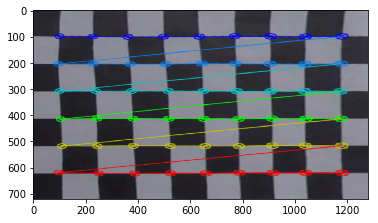

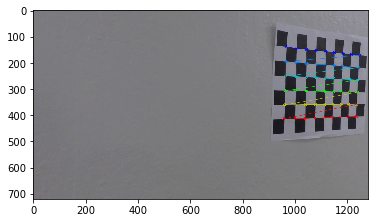

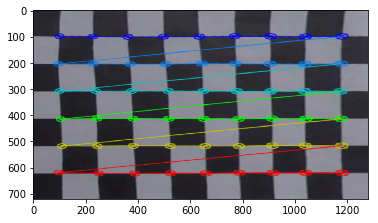

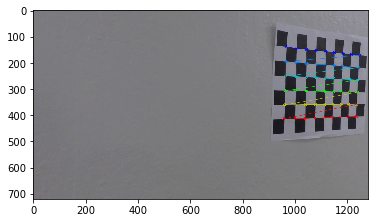

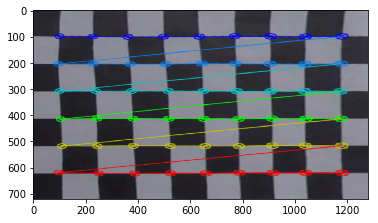

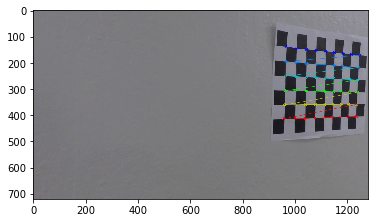

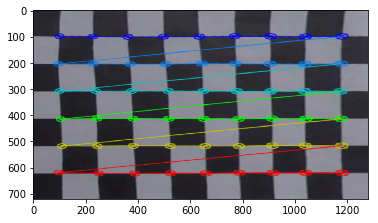

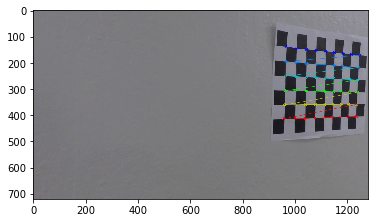

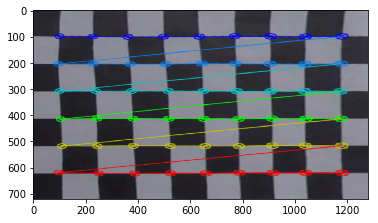

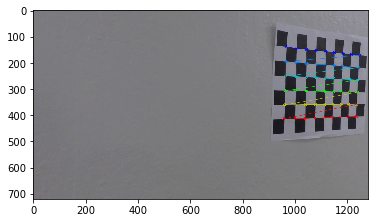

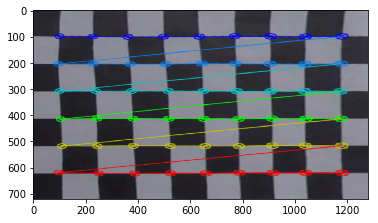

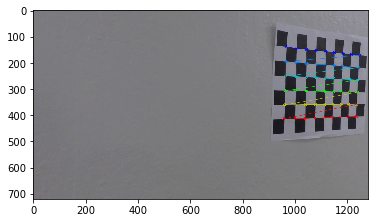

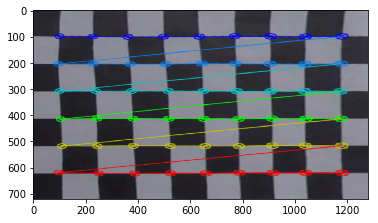

In [33]:
for fname in imageset:
    performPerspectiveTransform(fname)